In [299]:
import numpy as np
import pandas as pd
import neural_network as nn
import matplotlib.pyplot as plt

In [300]:
data_addresses=["Datasets/tweets/train.csv"]

In [301]:
class FileReader:
    def __init__(self,data_addresses):
        '''
        data_addresses is the list of addresses of files from where you want to read the data
        =======
        Format:
        =======
        sentence \t score \n
        '''
        self.data_addresses=data_addresses

    def read_data(self):
        data=np.empty((0,2))
        for add in self.data_addresses:
            df=pd.read_csv(add)
            df=df.iloc[:,1:]#ignore the id column
            
            data=np.concatenate((data,np.array(df)))
        data[:,[0,1]]=data[:,[1,0]]
        return data

    def get_vocabulary(self,data):
        self.word_to_number={}
        index=0
        for str in data[:,0]:
            for word in str.split():
                if not(word in word_to_number):
                    word_to_number[word]=index
                    index+=1

        self.number_to_word=dict((v,k) for k,v in word_to_number.items())

    def vectorize(self,data):
        converted_data=np.zeros((data.shape[0],self.total_words+1),dtype=np.bool8)# last entry for the label
        print(converted_data.shape)
        for i in range(data.shape[0]):
            for word in data[i][0].split():
                converted_data[i][word_to_number[word]]=1
            converted_data[i][-1]=data[i][1]#correct label
        return converted_data

    def generate_data(self,split=0.8):
        data=self.read_data()
        self.get_vocabulary(data)
        self.total_words=len(word_to_number)
        self.data=self.vectorize(data)
        split=int(split*self.data.shape[0])
        self.x_train=self.data[0:split,:-1]
        self.x_test=self.data[split:,:-1]
        self.y_train=self.data[0:split,-1]
        self.y_test=self.data[split:,-1]

    

In [302]:
fr=FileReader(data_addresses)
fr.generate_data()


(31962, 105531)


In [303]:

print(fr.x_train.shape)
print(fr.y_train.shape)
print(fr.x_test.shape)
print(fr.y_test.shape)

(25569, 105530)
(25569,)
(6393, 105530)
(6393,)


In [304]:
x_train=fr.x_train
y_train=fr.y_train
x_test=fr.x_test
y_test=fr.y_test

# also make one validaiton set from x_train
split=int(x_train.shape[0]*0.5)
x_valid,y_valid,x_train,y_train=(x_train[split:-1],y_train[split:-1],x_train[0:split],y_train[0:split])
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(12784, 105530)
(12784,)
(12784, 105530)
(12784,)


In [305]:
model=nn.NeuralNetwork(3,[16,16,2],fr.total_words,'tanh')

In [306]:
nn.train?

In [307]:
losses=nn.train(model,x_train,y_train.astype('int64'),500,0.01,False)

MemoryError: Unable to allocate 10.1 GiB for an array with shape (12784, 105530) and data type float64

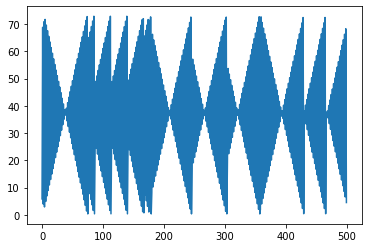

In [219]:
plt.plot(losses)